In [306]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import expit
from numpy.random import gamma, normal

In [307]:
K = 120
r1 = np.array([3, 5, 2, 7, 7, 2, 5, 3, 5, 11, 6, 6, 11, 4, 4, 2, 8, 8, 6,  
               5, 15, 4, 9, 9, 4, 12, 8, 8, 6, 8, 12, 4, 7, 16, 12, 9, 4, 7, 
               8, 11, 5, 12, 8, 17, 9, 3, 2, 7, 6, 5, 11, 14, 13, 8, 6, 4, 8, 
               4, 8, 7, 15, 15, 9, 9, 5, 6, 3, 9, 12, 14, 16, 17, 8, 8, 9, 5, 
               9, 11, 6, 14, 21, 16, 6, 9, 8, 9, 8, 4, 11, 11, 6, 9, 4, 4, 9, 
               9, 10, 14, 6, 3, 4, 6, 10, 4, 3, 3, 10, 4, 10, 5, 4, 3, 13, 1, 
               7, 5, 7, 6, 3, 7])
n1 = np.array([28, 21, 32, 35, 35, 38, 30, 43, 49, 53, 31, 35, 46, 53, 61, 
               40, 29, 44, 52, 55, 61, 31, 48, 44, 42, 53, 56, 71, 43, 43, 43, 
               40, 44, 70, 75, 71, 37, 31, 42, 46, 47, 55, 63, 91, 43, 39, 35, 
               32, 53, 49, 75, 64, 69, 64, 49, 29, 40, 27, 48, 43, 61, 77, 55, 
               60, 46, 28, 33, 32, 46, 57, 56, 78, 58, 52, 31, 28, 46, 42, 45, 
               63, 71, 69, 43, 50, 31, 34, 54, 46, 58, 62, 52, 41, 34, 52, 63, 
               59, 88, 62, 47, 53, 57, 74, 68, 61, 45, 45, 62, 73, 53, 39, 45, 
               51, 55, 41, 53, 51, 42, 46, 54, 32])
r0 = np.array([0, 2, 2, 1, 2, 0, 1, 1, 1, 2, 4, 4, 2, 1, 7, 4, 3, 5, 3, 2, 
               4, 1, 4, 5, 2, 7, 5, 8, 2, 3, 5, 4, 1, 6, 5, 11, 5, 2, 5, 8, 
               5, 6, 6, 10, 7, 5, 5, 2, 8, 1, 13, 9, 11, 9, 4, 4, 8, 6, 8, 6, 
               8, 14, 6, 5, 5, 2, 4, 2, 9, 5, 6, 7, 5, 10, 3, 2, 1, 7, 9, 13, 
               9, 11, 4, 8, 2, 3, 7, 4, 7, 5, 6, 6, 5, 6, 9, 7, 7, 7, 4, 2, 
               3, 4, 10, 3, 4, 2, 10, 5, 4, 5, 4, 6, 5, 3, 2, 2, 4, 6, 4, 1])
n0 = np.array([28, 21, 32, 35, 35, 38, 30, 43, 49, 53, 31, 35, 46, 53, 61, 
               40, 29, 44, 52, 55, 61, 31, 48, 44, 42, 53, 56, 71, 43, 43, 43, 
               40, 44, 70, 75, 71, 37, 31, 42, 46, 47, 55, 63, 91, 43, 39, 35, 
               32, 53, 49, 75, 64, 69, 64, 49, 29, 40, 27, 48, 43, 61, 77, 55, 
               60, 46, 28, 33, 32, 46, 57, 56, 78, 58, 52, 31, 28, 46, 42, 45, 
               63, 71, 69, 43, 50, 31, 34, 54, 46, 58, 62, 52, 41, 34, 52, 63, 
               59, 88, 62, 47, 53, 57, 74, 68, 61, 45, 45, 62, 73, 53, 39, 45, 
               51, 55, 41, 53, 51, 42, 46, 54, 32])
year = np.array([-10, -9, -9, -8, -8, -8, -7, -7, -7, -7, -6, -6, -6, -6, -6, 
                 -5, -5, -5, -5, -5, -5, -4, -4, -4, -4, -4, -4, -4, -3, -3, -3, 
                 -3, -3, -3, -3, -3, -2, -2, -2, -2, -2, -2, -2, -2, -2, -1, -1, 
                 -1, -1, -1, -1, -1, -1, -1, -1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 
                 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 
                 3, 3, 3, 3, 3, 3, 4, 4, 4, 4, 4, 4, 4, 5, 5, 5, 5, 5, 5, 6, 6, 
                 6, 6, 6, 7, 7, 7, 7, 8, 8, 8, 9, 9, 10])

In [308]:
[len(r1) == K, len(n1) == K, len(r0) == K, len(n0) == K, len(year) == K]

[True, True, True, True, True]

In [309]:
init_alpha = 0
init_beta1 = 0
init_beta2 = 0
init_sigma = 1/10
init_mu = np.zeros(120)
init_b  = np.zeros(120)

In [310]:
# paramétrisation gamma
def Sampler(nchain, init_alpha, init_beta1, init_beta2, init_sigma, init_mu, init_b, prop_sd, K, r1, n1, r0, n0, year):
    
    alpha = init_alpha
    beta1 = init_beta1
    beta2 = init_beta2
    sigma = init_sigma
    mu = init_mu
    b = init_b 
    
    log_psi = alpha + beta1 * year + beta2 * (year**2 - 22) + b
    p0 = expit(mu)
    p1 = expit(mu + log_psi)
    
    chain = np.zeros((nchain+1, 4))
    b_chain = np.zeros((nchain+1, K))
    mu_chain = np.zeros((nchain+1, K))
    
    chain[0,0] = init_alpha
    chain[0,1] = init_beta1
    chain[0,2] = init_beta2
    chain[0,3] = init_sigma
    b_chain[0,:] = init_b
    mu_chain[0,:] = init_mu

    for i in range(nchain):
        
        # Mise à jour de alpha
        prop = normal(loc = alpha, scale = prop_sd[0])
        prop_log_psi = prop + beta1 * year + beta2 * (year**2 - 22) + b
        prop_p1 = expit(mu + prop_log_psi)
        
        top = - (prop**2 / (2 * 1e6)) + sum(r1 * np.log(prop_p1)) + sum((n1-r1) * np.log(1 - prop_p1))
        bottom = - (alpha**2 / (2 * 1e6)) + sum(r1 * np.log(p1)) + sum((n1-r1) * np.log(1 - p1))
        
        acc_prob = np.exp(top - bottom)
        
        if np.random.uniform() < acc_prob:
            alpha = prop
            log_psi = prop_log_psi
            p1 = prop_p1
        
        # Mise à jour de beta1
        prop = normal(loc = beta1, scale = prop_sd[1])
        prop_log_psi = alpha + prop * year + beta2 * (year**2 - 22) + b
        prop_p1 = expit(mu + prop_log_psi)
        
        top = - (prop**2 / (2 * 1e6)) + sum(r1 * np.log(prop_p1)) + sum((n1-r1) * np.log(1 - prop_p1))
        bottom = - (beta1**2 / (2 * 1e6)) + sum(r1 * np.log(p1)) + sum((n1-r1) * np.log(1 - p1))
        
        acc_prob = np.exp(top - bottom)
        
        if np.random.uniform() < acc_prob:
            beta1 = prop
            log_psi = prop_log_psi
            p1 = prop_p1
            
        # Mise à jour de beta2
        prop = normal(loc = beta2, scale = prop_sd[2])
        prop_log_psi = alpha + beta1 * year + prop * (year**2 - 22) + b
        prop_p1 = expit(mu + prop_log_psi)
        
        top = - (prop**2 / (2 * 1e6)) + sum(r1 * np.log(prop_p1)) + sum((n1-r1) * np.log(1 - prop_p1))
        bottom = - (beta2**2 / (2 * 1e6)) + sum(r1 * np.log(p1)) + sum((n1-r1) * np.log(1 - p1))
        
        acc_prob = np.exp(top - bottom)
        
        if np.random.uniform() < acc_prob:
            beta2 = prop
            log_psi = prop_log_psi
            p1 = prop_p1
            
        # Mise à jour de sigma
        sigma = 1 / gamma(shape = 1e-3 + K/2, scale = 1e-3 + 0.5 * sum(b**2))
            
        for j in range(K):
            
            # Mise à jour de mu
            prop = normal(loc = mu[j], scale = prop_sd[3])
            prop_p0_j = expit(prop)
            prop_p1_j = expit(prop + log_psi[j])
            
            top = - (prop**2 / (2 * 1e6)) + r0[j] * np.log(prop_p0_j) + (n0[j] - r0[j]) * np.log(1 - prop_p0_j) + r1[j] * np.log(prop_p1_j) + (n1[j] - r1[j]) * np.log(1 - prop_p1_j)
            bottom = - (mu[j]**2 / (2 * 1e6)) + r0[j] * np.log(p0[j]) + (n0[j] - r0[j]) * np.log(1 - p0[j]) + r1[j] * np.log(p1[j]) + (n1[j] - r1[j]) * np.log(1 - p1[j])
            
            acc_prob = np.exp(top - bottom)
            
            if np.random.uniform() < acc_prob:
                mu[j] = prop
                p0[j] = prop_p0_j
                p1[j] = prop_p1_j
                
            # Mise à jour de b
            prop = normal(loc = b[j], scale = prop_sd[4])
            prop_log_psi_j = alpha + beta1 * year[j] + beta2 * (year[j]**2 - 22) + prop
            prop_p1_j = expit(mu[j] + prop_log_psi_j)
            
            top = - (prop**2 / (2 * sigma)) + r1[j] * np.log(prop_p1_j) + (n1[j] - r1[j]) * np.log(1 - prop_p1_j)
            bottom = - (b[j]**2 / (2 * sigma)) + r1[j] * np.log(p1[j]) + (n1[j] - r1[j]) * np.log(1 - p1[j])
            
            acc_prob = np.exp(top - bottom)
            
            if np.random.uniform() < acc_prob:
                b[j] = prop
                log_psi[j] = prop_log_psi_j
                p1[j] = prop_p1_j
        
        # Mise à jour des chaines
        chain[i+1,:] = np.array([alpha, beta1, beta2, sigma])
        b_chain[i+1,:] = b 
        mu_chain[i+1,:] = mu
        
    return(chain, b_chain, mu_chain)  

In [337]:
chain, b_chain, mu_chain = Sampler(10000, init_alpha, init_beta1, init_beta2, init_sigma, init_mu, init_b, np.array([0.05, 0.03, 0.003, 0.1, 1]), K, r1, n1, r0, n0, year)

In [338]:
chain

array([[ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         1.00000000e-01],
       [ 8.59976368e-02, -1.22453448e-02, -1.62246582e-03,
         1.75998596e-02],
       [ 1.21073649e-01, -1.22453448e-02, -4.77146480e-04,
         1.52780963e-02],
       ...,
       [ 5.23094665e-01, -3.35749345e-02,  6.24253618e-03,
         1.60761312e-02],
       [ 4.73927866e-01, -3.35749345e-02,  6.06415429e-03,
         1.68473340e-02],
       [ 4.69262337e-01, -3.35749345e-02,  2.72873000e-03,
         1.51975210e-02]])

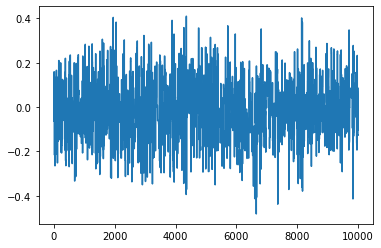

In [339]:
plt.plot(b_chain[:,10])

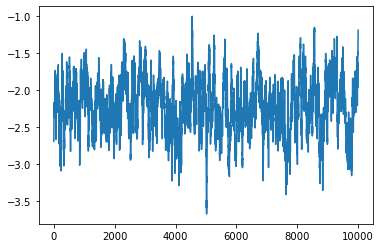

In [340]:
plt.plot(mu_chain[:,10])

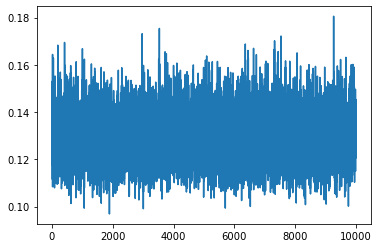

In [344]:
plt.plot(np.sqrt(chain[:,3][1:]))

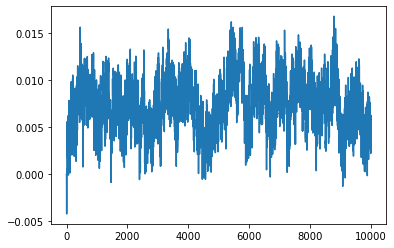

In [345]:
plt.plot(chain[:,2])